# **Algorithms Exploratory Analysis**

In the first part of the report we make an exploratory analysis of each algorithm that we've chosen to study in this project, after that there is a performance comparison between them

## General Modeling


In this work we have modeled the problem according to four base approaches, all of them consider the 
Maze as a matrix made of walls, ghosts, coins and free positions. Just the positions containing a coin or free positions can be run, thus in our models there is no difference between walls and ghosts, both are not permitted. The start and the target positions are also indicated in the maze matrix.

The four approaches differs from each other on the **path cost**:
    
* 1 - Each step has cost 1;    

* 2 - Each step has cost 1 if the next position doesn't contain a coin, otherwise it costs -1;

* 3 - Each step has cost 1 if the next position doesn't contain a coin, otherwise it costs -2;    

* 4 - Each step has cost 0 if the next position doesn't contain a coin, otherwise it costs -1.

The function cost 1 aims to **minimize the path cost**, whereas the others tries to catch some coins even running through a bit longer path.

## **Required Imports**

In [1]:
from pac_man.search import uniform_cost_search
from pac_man.search import iterative_deepening_search
from pac_man.pacman_problem import PacManProblem
from pac_man.pacman_problem_2 import PacManProblem2
from pac_man.pacman_problem_3 import PacManProblem3
from pac_man.maze_generator import generator

## **Uniform Cost Search**

We consider the 3rd model, in which each step has cost 1 if the next position doesn't contain a coin, otherwise it costs -2. We compare two mazes with and without coins, in order to see if it impacts on the chosen path.

### 3th model: Maze without coins

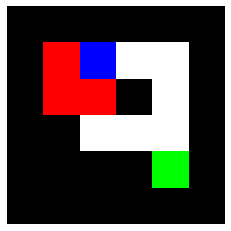

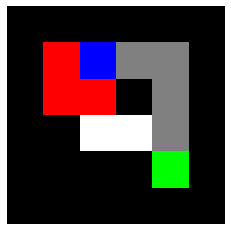

In [43]:
maze = generator.MAZE_teste
problem = PacManProblem(initial=maze.start_position, goal=maze.goal_position, maze_map=maze.maze_map)
root = uniform_cost_search(problem)
path = root.solution()

maze.show_search_path()
maze.show_search_path(reached=path)

### 3th model: Maze with a coin

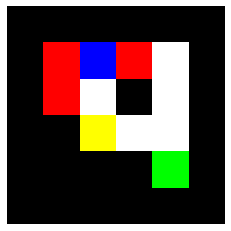

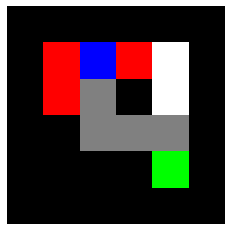

In [40]:
maze = generator.MAZE_teste_coin
problem = PacManProblem(initial=maze.start_position, goal=maze.goal_position, maze_map=maze.maze_map)
root = uniform_cost_search(problem)
path = root.solution()

maze.show_search_path()
maze.show_search_path(reached=path)

Now, we tested the 2nd and the 4th models to compare it with the previous one.

### 2nd Model

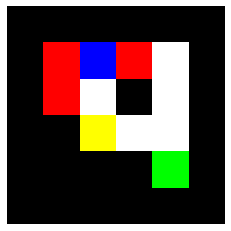

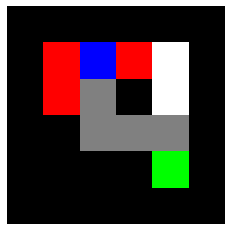

In [41]:
maze = generator.MAZE_teste_coin
problem = PacManProblem2(initial=maze.start_position, goal=maze.goal_position, maze_map=maze.maze_map)
root = uniform_cost_search(problem)
path = root.solution()

maze.show_search_path()
maze.show_search_path(reached=path)

### 4th Model

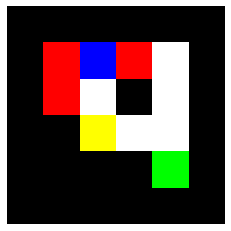

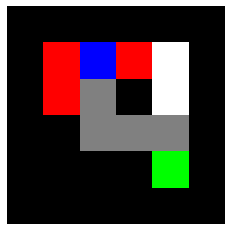

In [5]:
maze = generator.MAZE_teste_coin
problem = PacManProblem3(initial=maze.start_position, goal=maze.goal_position, maze_map=maze.maze_map)
root = uniform_cost_search(problem)
path = root.solution()

maze.show_search_path()
maze.show_search_path(reached=path)

Note that the two possible paths have the same cost, however in the maze without coins the agent goes through the top path, and when we place a coin in the maze it makes the agent choose the bottom path, because the it is rewarded with extras points.

Now, let's consider a maze where the path containing coins is necessarily greater than the straight path, in this way we can assess whether the rewards are enough to deviate the agent from the shortest path to collect some coins.

### 2nd Model

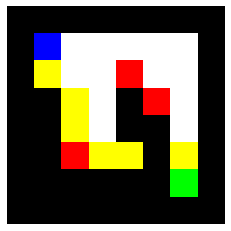

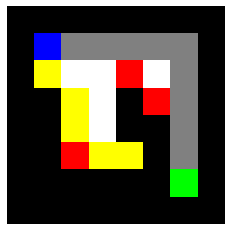

In [6]:
maze = generator.MAZE_6
problem = PacManProblem2(initial=maze.start_position, goal=maze.goal_position, maze_map=maze.maze_map)
root = uniform_cost_search(problem)
path = root.solution()

maze.show_search_path()
maze.show_search_path(reached=path)

### 3th Model

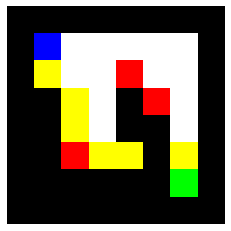

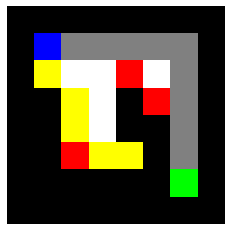

In [44]:
maze = generator.MAZE_6
problem = PacManProblem(initial=maze.start_position, goal=maze.goal_position, maze_map=maze.maze_map)
root = uniform_cost_search(problem)
path = root.solution()

maze.show_search_path()
maze.show_search_path(reached=path)

### 4th Model

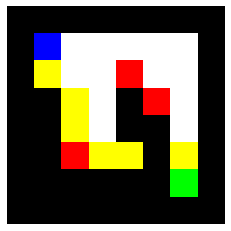

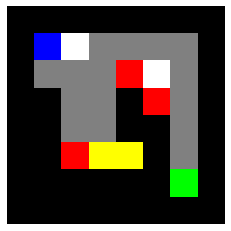

In [8]:
maze = generator.MAZE_6
problem = PacManProblem3(initial=maze.start_position, goal=maze.goal_position, maze_map=maze.maze_map)
root = uniform_cost_search(problem)
path = root.solution()

maze.show_search_path()
maze.show_search_path(reached=path)

It can be seen that the 2nd model was not appropriate to collect the coins, it took the shortest path. On the other hand, the 3rd and 4th model had a good result collecting the possible coins. Note that the two coins in the bottom are not reachable, because it would require the agent return to a already visited position which in our modeling results in a repeated state.

### Worst Case

In order to test the capability of the agent of capturing coins distant from the beginning in each modeling, we created a maze where there is only one coin and it is far away from the start position, but the target position is close to the start. We have this test for three different PacManProblem implementations

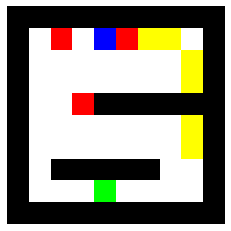

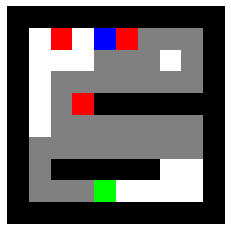

In [9]:
maze = generator.MAZE_10x10
problem = PacManProblem3(initial=maze.start_position, goal=maze.goal_position, maze_map=maze.maze_map)
root = uniform_cost_search(problem)
path = root.solution()

maze.show_search_path()
maze.show_search_path(reached=path)

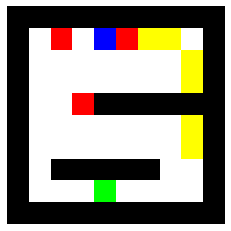

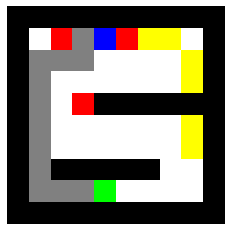

In [10]:
maze = generator.MAZE_10x10
problem = PacManProblem2(initial=maze.start_position, goal=maze.goal_position, maze_map=maze.maze_map)
root = uniform_cost_search(problem)
path = root.solution()

maze.show_search_path()
maze.show_search_path(reached=path)

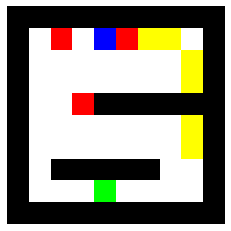

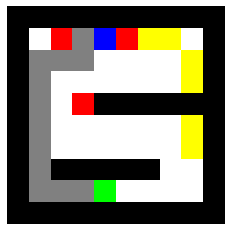

In [12]:
maze = generator.MAZE_10x10
problem = PacManProblem(initial=maze.start_position, goal=maze.goal_position, maze_map=maze.maze_map)
root = uniform_cost_search(problem)
path = root.solution()

maze.show_search_path()
maze.show_search_path(reached=path)

None of the models were capable of the reach the position with the coin, because the agent arrives in the target position before reach the coin. 

# **Iterative Deepening Search**

This method combines the good side of two algorithmns, breadth first search and depth first search, so it is an algorithm with memory complexity of dfs (which is lower when compared to bfs complexity), but it is complete like bfs.

### Experiments


On these tests, we can see that this uninformed search method always finds the fastest path to the goal, regardless of the way the problem was modeled. It never optimizes the number of collected coins, once it does not inspect the cost function, and gets based only on the proximity of the goal

The bigger maze in which we could run this algorithm was an 8x8, on mazes with size upper than that the search method did not provide a solution in a reasonable time

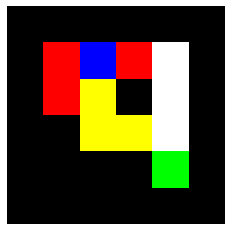

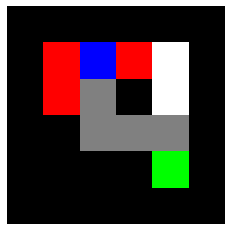

In [13]:
maze = generator.MAZE_simple_coin

pacman_problem = PacManProblem(maze.start_position, maze.goal_position, maze.maze_map)
root = iterative_deepening_search(pacman_problem)
path = root.solution()

maze.show_search_path()
maze.show_search_path(reached=path)

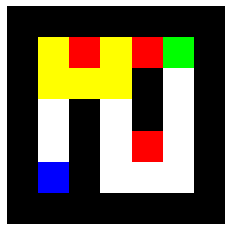

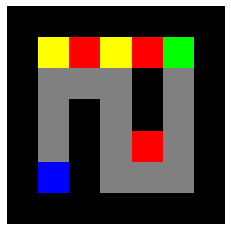

In [14]:
maze = generator.MAZE_1

pacman_problem = PacManProblem3(maze.start_position, maze.goal_position, maze.maze_map)
root = iterative_deepening_search(pacman_problem)
path = root.solution()

maze.show_search_path()
maze.show_search_path(reached=path)

Next we can see the same maze being processed with three different cost functions for the problem, since the algorithm does not inspect the function, the result is always the same

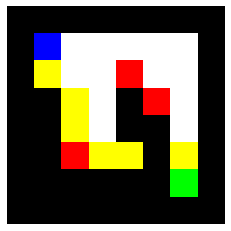

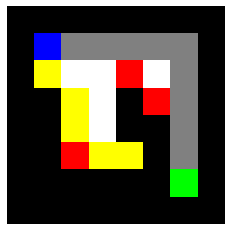

In [15]:
maze = generator.MAZE_X

pacman_problem = PacManProblem(maze.start_position, maze.goal_position, maze.maze_map)
root = iterative_deepening_search(pacman_problem)
path = root.solution()

maze.show_search_path()
maze.show_search_path(reached=path)

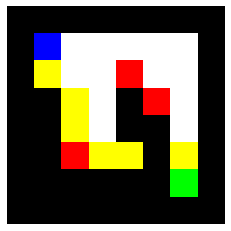

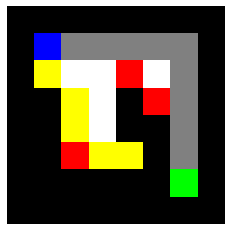

In [16]:
maze = generator.MAZE_X

pacman_problem = PacManProblem2(maze.start_position, maze.goal_position, maze.maze_map)
root = iterative_deepening_search(pacman_problem)
path = root.solution()

maze.show_search_path()
maze.show_search_path(reached=path)

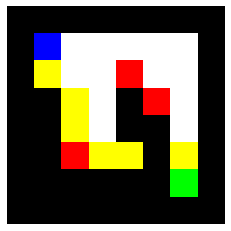

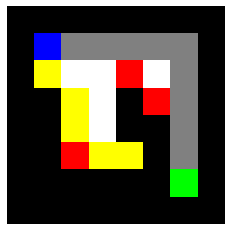

In [17]:
maze = generator.MAZE_X

pacman_problem = PacManProblem3(maze.start_position, maze.goal_position, maze.maze_map)
root = iterative_deepening_search(pacman_problem)
path = root.solution()

maze.show_search_path()
maze.show_search_path(reached=path)

# **A* Search**

In the experiments carried out with this search algorithm was only considered the 1st modeling, then the path cost g(n) is such that each move cost 1.

Initially, we considered the heuristic as the manhattan distance, thus
h(n) is the manhattan distance from the current state to the goal.

**Consistency Prove**
Let's prove that h(n) is a consistent heuristc.

We know that the cost of going from one state to the next is always 1. Then, given the current state n, the cost of going to the next position is c(n, a, n+1) = 1.

Now, there two possible cases: h(n) < h(n+1) or h(n) >= h(n+1).

* If h(n) < h(n+1), then it is trivial that h(n) <= c(n, a, n+1)+h(n+1).

* Note that for the case which h(n) >= h(n+1),  h(n)-h(n+1) <= 1. Because given the agent walked just one position the manhattan dist can reduce at most 1. 
Then, in the worst case we have h(n) = h(n+1)+1. But we already know that c(n, a, n+1) = 1, thus h(n) = c(n, a, n+1) + h(n+1).

Therefore, we conclude that h(n) is a consistent heuristic.


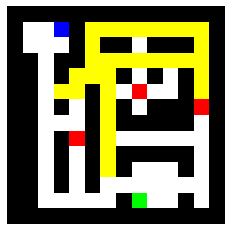

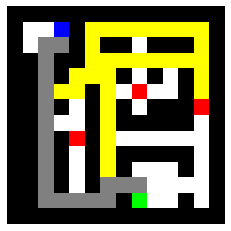

In [18]:
from pac_man.search import astar_search, uniform_cost_search
from pac_man.pacman_problem_astar import PacManProblem
from pac_man.maze_generator import generator
from pac_man.utils import manhattan_distance
from pac_man.maze_generator import state

def h(node, goal, maze):    
    return manhattan_distance(node.state, goal)

maze = generator.MAZE_14
problem = PacManProblem(initial=maze.start_position, goal=maze.goal_position, 
                        maze_map=maze.maze_map, heuristic=h)
root = astar_search(problem)
maze.show_search_path()
maze.show_search_path(reached=root.solution())

We can see that the agent found correctlt the shortest path, as expected.

### Optimizing the path cost and going through coins

In these heuristics it is set a lower weight to those paths in which there is a coin, so that when the agent has to choose between a free position and a position with a coin, the latter is more likely to be preferred. However when the agent has to choose among paths with coins, the selected is the one that leads to the least distance, once the it doesn't know whether afterwards there will be a coin or not, thus it is reasonable going through the shorter path. 

It is clear that these heuristics that try to collect some coins are not consistent, they do not optimize the path cost. For instance, if we consider the heuristic that rewards by 1 for each collected coin, then in the worst case, where manhattan_dist(n, goal) = manhattan_dist(n+1, goal)+1, with next position containing a coin and the current position does not, we have the relation:

 h(n) = manhattan_dist(n, goal) = manhattan_dist(n+1, goal) + 1

 h(n+1) = manhattan_dist(n+1, goal) - 1

 c(n, a, n+1) = 1

 then follows that h(n) > h(n+1) + c(n, a, n+1).

Therefore, the heuristics considering this type of reward are not consistent. However, we consider as a good experiment testing them, to see the impact on the chosen path.

We tested two different heuristics following this reasioning, both approaches consider as default case the manhattan distance, but the first one rewards the coin positions reducing by 1 the manhattan distance, and the second one reducing by 2.

In the first case the rewards wasn't enough to deviate the path via the coins, but reducing by 2 seems good. Because of choosing the shorter path when all positions contain coins, in the second case the agent went down straight to the goal, instead of fist collecting more coins through the "coin circuit" and just then heading to the goal.

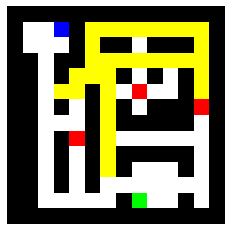

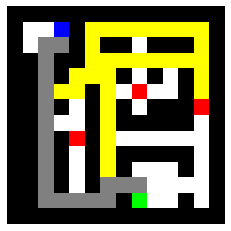

In [42]:
from pac_man.search import astar_search, uniform_cost_search
from pac_man.pacman_problem_astar import PacManProblem
from pac_man.maze_generator import generator
from pac_man.utils import manhattan_distance
from pac_man.maze_generator import state

def h(node, goal, maze):
    i, j = node.state
    d = manhattan_distance(node.state, goal)
    if maze[i][j] == state.COIN:        
        return d-1
    return d

maze = generator.MAZE_14
problem = PacManProblem(initial=maze.start_position, goal=maze.goal_position, 
                        maze_map=maze.maze_map, heuristic=h)
root = astar_search(problem)
maze.show_search_path()
maze.show_search_path(reached=root.solution())

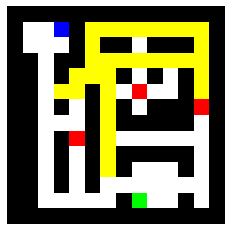

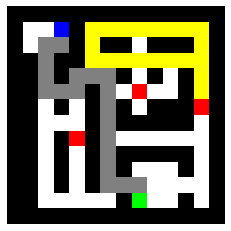

In [21]:
from pac_man.search import astar_search, uniform_cost_search
from pac_man.pacman_problem_astar import PacManProblem
from pac_man.maze_generator import generator
from pac_man.utils import manhattan_distance
from pac_man.maze_generator import state

def h(node, goal, maze):
    i, j = node.state
    d = manhattan_distance(node.state, goal)
    if maze[i][j] == state.COIN:        
        return d-2
    return d

maze = generator.MAZE_14
problem = PacManProblem(initial=maze.start_position, goal=maze.goal_position, 
                        maze_map=maze.maze_map, heuristic=h)
root = astar_search(problem)
maze.show_search_path()
maze.show_search_path(reached=root.solution())

This simple maze ilustrates the effect of changing the heuristic, note that rewarding the coin positions, 
regardless of the reward, deviates the path even when two possible paths have the same length, but different cost.

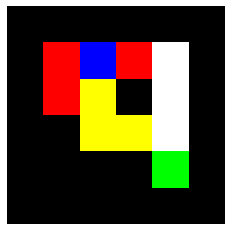

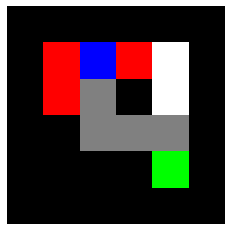

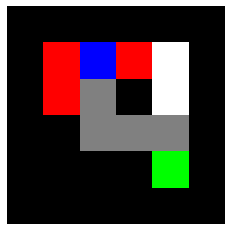

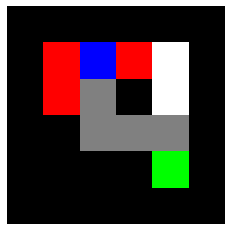

In [22]:
from pac_man.search import astar_search, uniform_cost_search
from pac_man.pacman_problem_astar import PacManProblem
from pac_man.maze_generator import generator
from pac_man.utils import manhattan_distance
from pac_man.maze_generator import state

def h(node, goal, maze):    
    return manhattan_distance(node.state, goal)

def h_1(node, goal, maze):
    i, j = node.state
    d = manhattan_distance(node.state, goal)
    if maze[i][j] == state.COIN:        
        return d-1
    return d

def h_2(node, goal, maze):
    i, j = node.state
    d = manhattan_distance(node.state, goal)
    if maze[i][j] == state.COIN:        
        return d-2
    return d

maze = generator.MAZE_simple_coin
problem = PacManProblem(initial=maze.start_position, goal=maze.goal_position, 
                        maze_map=maze.maze_map, heuristic=h)
root = astar_search(problem)
maze.show_search_path()
maze.show_search_path(reached=root.solution())

problem = PacManProblem(initial=maze.start_position, goal=maze.goal_position, 
                        maze_map=maze.maze_map, heuristic=h_1)
root = astar_search(problem)
maze.show_search_path(reached=root.solution())

problem = PacManProblem(initial=maze.start_position, goal=maze.goal_position, 
                        maze_map=maze.maze_map, heuristic=h_2)
root = astar_search(problem)
maze.show_search_path(reached=root.solution())

It is clear that when we consider only the manhattan distance, regardless of the position containing or not a coin, the agent doesn't differ the paths even if one is full of coins and the other doesn't  have any coins, both with same length. However, when we reward it as it collects the coins, it chooses the path with more coins since both have the same length.

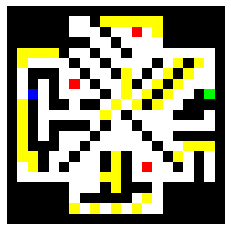

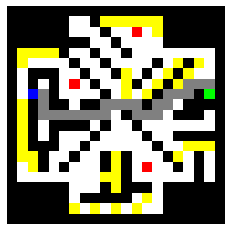

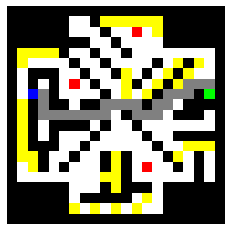

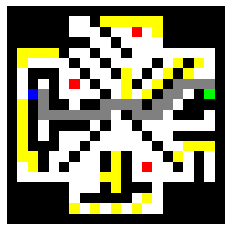

In [23]:
from pac_man.search import astar_search, uniform_cost_search
from pac_man.pacman_problem_astar import PacManProblem
from pac_man.maze_generator import generator
from pac_man.utils import manhattan_distance
from pac_man.maze_generator import state

def h(node, goal, maze):    
    return manhattan_distance(node.state, goal)

def h_1(node, goal, maze):
    i, j = node.state
    d = manhattan_distance(node.state, goal)
    if maze[i][j] == state.COIN:        
        return d-1
    return d

def h_2(node, goal, maze):
    i, j = node.state
    d = manhattan_distance(node.state, goal)
    if maze[i][j] == state.COIN:        
        return d-2
    return d

maze = generator.MAZE_3
problem = PacManProblem(initial=maze.start_position, goal=maze.goal_position, 
                        maze_map=maze.maze_map, heuristic=h)
root = astar_search(problem)
maze.show_search_path()
maze.show_search_path(reached=root.solution())

problem = PacManProblem(initial=maze.start_position, goal=maze.goal_position, 
                        maze_map=maze.maze_map, heuristic=h_1)
root = astar_search(problem)
maze.show_search_path(reached=root.solution())

problem = PacManProblem(initial=maze.start_position, goal=maze.goal_position, 
                        maze_map=maze.maze_map, heuristic=h_2)
root = astar_search(problem)
maze.show_search_path(reached=root.solution())

In this experiment, we can see that rewaring by 1 point for each coin was not enough to change the path. But when we reward it by 2 for each coin, it catch one more coin, the one close to the target position.

However, there are cases which the heuristics don't have effect, such as the following one. It is because the reward is not enough, and if the agent had decided collect any coin more, it would have paied a much higher price.

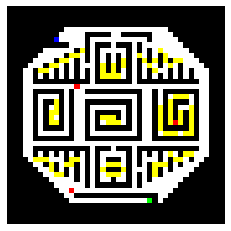

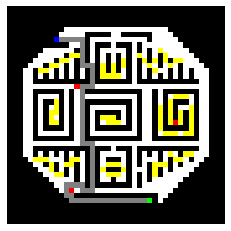

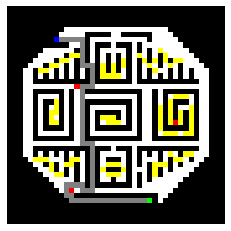

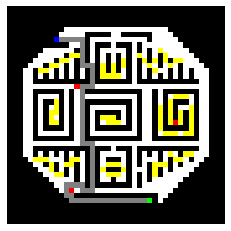

In [24]:
from pac_man.search import astar_search, uniform_cost_search
from pac_man.pacman_problem_astar import PacManProblem
from pac_man.maze_generator import generator
from pac_man.utils import manhattan_distance
from pac_man.maze_generator import state

def h(node, goal, maze):    
    return manhattan_distance(node.state, goal)

def h_1(node, goal, maze):
    i, j = node.state
    d = manhattan_distance(node.state, goal)
    if maze[i][j] == state.COIN:        
        return d-1
    return d

def h_2(node, goal, maze):
    i, j = node.state
    d = manhattan_distance(node.state, goal)
    if maze[i][j] == state.COIN:        
        return d-2
    return d

maze = generator.MAZE_5
problem = PacManProblem(initial=maze.start_position, goal=maze.goal_position, 
                        maze_map=maze.maze_map, heuristic=h)
root = astar_search(problem)
maze.show_search_path()
maze.show_search_path(reached=root.solution())

problem = PacManProblem(initial=maze.start_position, goal=maze.goal_position, 
                        maze_map=maze.maze_map, heuristic=h_1)
root = astar_search(problem)
maze.show_search_path(reached=root.solution())

problem = PacManProblem(initial=maze.start_position, goal=maze.goal_position, 
                        maze_map=maze.maze_map, heuristic=h_2)
root = astar_search(problem)
maze.show_search_path(reached=root.solution())

## **Best First Search**

Best first search is an informed (heuristic) search, that decides which path to transverse based on a greedy choice of which of the adjacent nodes is the most promising i.e., closest to the destination. To do so it makes use of a priotity queue with node distances. For this algorithm, alongside the a star algorithm, we make use of manhattan distance. 

Best first search algorithm with manhattan distance heuristic only, does not consider coin value, only fastest position to the end.

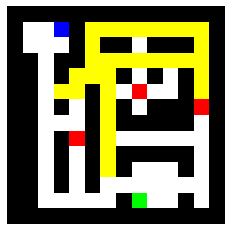

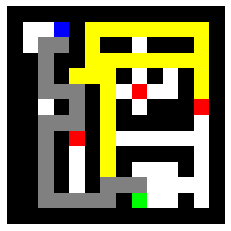

In [25]:
from pac_man.search import best_first_graph_search, uniform_cost_search
from pac_man.pacman_problem import PacManProblem
from pac_man.maze_generator import generator
from pac_man.utils import manhattan_distance
from pac_man.maze_generator import state

def h(node, goal, maze):    
    return manhattan_distance(node.state, goal)

maze = generator.MAZE_14

problem = PacManProblem(initial=maze.start_position, goal=maze.goal_position, 
                        maze_map=maze.maze_map)

heuristic = lambda node, goal=maze.goal_position, maze=maze.maze_map : h(node, goal, maze)  

root = best_first_graph_search(problem,heuristic)
maze.show_search_path()
maze.show_search_path(reached=root.solution())

Best first search, unlike a star, is not an optimal algorithm, and path from start to finish might not be as great as a star. Both however are quite similiar, with the main difference being the evaluation function to decide shortest path, a star makes use of f(n) = g(n) + h(n), while bfs in the greedy form makes use of f(n) = h(n), where h(n) is the heuristic function and g(n) is the distance from the start position to the adjacent positions. However a star does make more use of memory than greedy bfs as a counter exchange.

Modifying the heuristic to consider coin weights instead of simply distances changes the outcome behaviour to collect the coins and minimize distance. The outcome is the same as a star algorithm. Note: the chosen heuristic will still attempt to minimize distance over coin collection, the inverse is not valid.

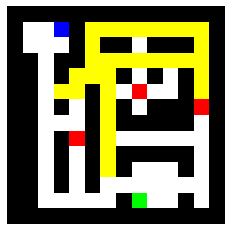

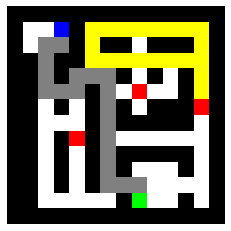

In [26]:
from pac_man.search import best_first_graph_search, uniform_cost_search
from pac_man.pacman_problem import PacManProblem
from pac_man.maze_generator import generator
from pac_man.utils import manhattan_distance
from pac_man.maze_generator import state

def h(node, goal, maze):
    i, j = node.state
    d = manhattan_distance(node.state, goal)
    if maze[i][j] == state.COIN:        
        return d-2
    return d

maze = generator.MAZE_14
problem = PacManProblem(initial=maze.start_position, goal=maze.goal_position, 
                        maze_map=maze.maze_map)

heuristic = lambda node, goal=maze.goal_position, maze=maze.maze_map : h(node, goal, maze)

root = best_first_graph_search(problem,heuristic)
maze.show_search_path()
maze.show_search_path(reached=root.solution())

Below is the comparison of 3 heuristics, one considering simply positions, and the other two consider coin cost. Note than when coin cost is taken into account, the algorithm will deviate the path to maximize coin collection.

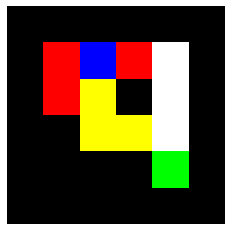

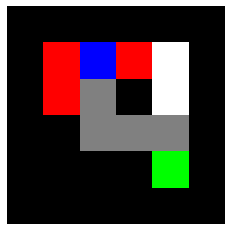

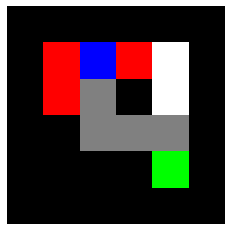

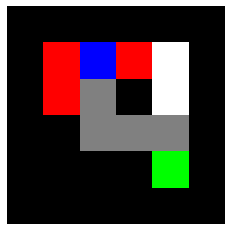

In [27]:
from pac_man.search import best_first_graph_search, uniform_cost_search
from pac_man.pacman_problem import PacManProblem
from pac_man.maze_generator import generator
from pac_man.utils import manhattan_distance
from pac_man.maze_generator import state

def h(node, goal, maze):    
    return manhattan_distance(node.state, goal)

def h_1(node, goal, maze):
    i, j = node.state
    d = manhattan_distance(node.state, goal)
    if maze[i][j] == state.COIN:        
        return d-1
    return d

def h_2(node, goal, maze):
    i, j = node.state
    d = manhattan_distance(node.state, goal)
    if maze[i][j] == state.COIN:        
        return d-2
    return d

maze = generator.MAZE_simple_coin
problem = PacManProblem(initial=maze.start_position, goal=maze.goal_position, 
                        maze_map=maze.maze_map)
heuristic = lambda node, goal=maze.goal_position, maze=maze.maze_map : h(node, goal, maze)
root = best_first_graph_search(problem,heuristic)
maze.show_search_path()
maze.show_search_path(reached=root.solution())

problem = PacManProblem(initial=maze.start_position, goal=maze.goal_position, 
                        maze_map=maze.maze_map)
heuristic = lambda node, goal=maze.goal_position, maze=maze.maze_map : h_1(node, goal, maze)
root = best_first_graph_search(problem,heuristic)
maze.show_search_path(reached=root.solution())

problem = PacManProblem(initial=maze.start_position, goal=maze.goal_position, 
                        maze_map=maze.maze_map)
heuristic = lambda node, goal=maze.goal_position, maze=maze.maze_map : h_2(node, goal, maze)
root = best_first_graph_search(problem,heuristic)
maze.show_search_path(reached=root.solution())

Below is the same comparison as above, however in a larger maze. The main difference from greedy bfs to a star is that a star found a more optimal path from start to finish no matter which heuristic. And also, the optimal solution found in a star, was also the same with coin collection consideration, while greedy bfs had a to perform a minor deviation to collect coin and possess same path outcome.

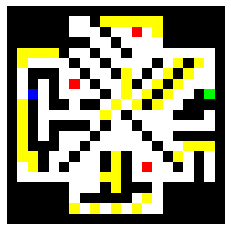

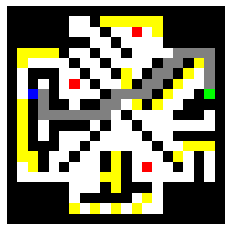

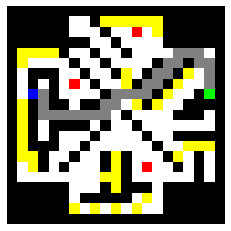

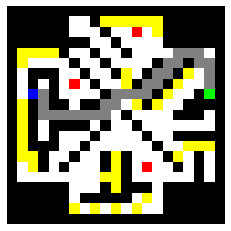

In [28]:
from pac_man.search import best_first_graph_search, uniform_cost_search
from pac_man.pacman_problem import PacManProblem
from pac_man.maze_generator import generator
from pac_man.utils import manhattan_distance
from pac_man.maze_generator import state

def h(node, goal, maze):    
    return manhattan_distance(node.state, goal)

def h_1(node, goal, maze):
    i, j = node.state
    d = manhattan_distance(node.state, goal)
    if maze[i][j] == state.COIN:        
        return d-1
    return d

def h_2(node, goal, maze):
    i, j = node.state
    d = manhattan_distance(node.state, goal)
    if maze[i][j] == state.COIN:        
        return d-2
    return d

maze = generator.MAZE_3
problem = PacManProblem(initial=maze.start_position, goal=maze.goal_position, 
                        maze_map=maze.maze_map)
heuristic = lambda node, goal=maze.goal_position, maze=maze.maze_map : h(node, goal, maze)
root = best_first_graph_search(problem,heuristic)
maze.show_search_path()
maze.show_search_path(reached=root.solution())

problem = PacManProblem(initial=maze.start_position, goal=maze.goal_position, 
                        maze_map=maze.maze_map)
heuristic = lambda node, goal=maze.goal_position, maze=maze.maze_map : h_1(node, goal, maze)
root = best_first_graph_search(problem,heuristic)
maze.show_search_path(reached=root.solution())

problem = PacManProblem(initial=maze.start_position, goal=maze.goal_position, 
                        maze_map=maze.maze_map)
heuristic = lambda node, goal=maze.goal_position, maze=maze.maze_map : h_2(node, goal, maze)
root = best_first_graph_search(problem,heuristic)
maze.show_search_path(reached=root.solution())

At last, in this example, no matter the heuristic, a star and greedy bfs did not perform a change in their path. The only difference amongst them is that a star found the optimal path, while greedy bfs found a path.

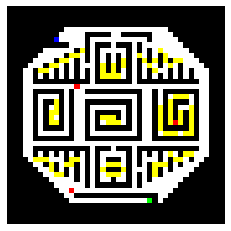

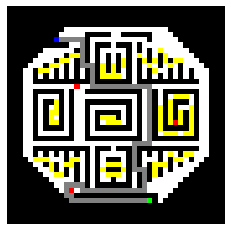

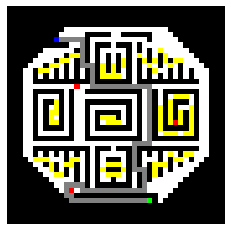

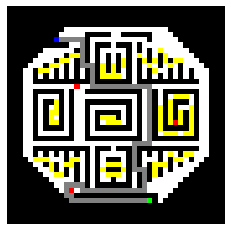

In [29]:
from pac_man.search import best_first_graph_search, uniform_cost_search
from pac_man.pacman_problem import PacManProblem
from pac_man.maze_generator import generator
from pac_man.utils import manhattan_distance
from pac_man.maze_generator import state

def h(node, goal, maze):    
    return manhattan_distance(node.state, goal)

def h_1(node, goal, maze):
    i, j = node.state
    d = manhattan_distance(node.state, goal)
    if maze[i][j] == state.COIN:        
        return d-1
    return d

def h_2(node, goal, maze):
    i, j = node.state
    d = manhattan_distance(node.state, goal)
    if maze[i][j] == state.COIN:        
        return d-2
    return d

maze = generator.MAZE_5
problem = PacManProblem(initial=maze.start_position, goal=maze.goal_position, 
                        maze_map=maze.maze_map)
heuristic = lambda node, goal=maze.goal_position, maze=maze.maze_map : h(node, goal, maze)
root = best_first_graph_search(problem,heuristic)
maze.show_search_path()
maze.show_search_path(reached=root.solution())

problem = PacManProblem(initial=maze.start_position, goal=maze.goal_position, 
                        maze_map=maze.maze_map)
heuristic = lambda node, goal=maze.goal_position, maze=maze.maze_map : h_1(node, goal, maze)
root = best_first_graph_search(problem,heuristic)
maze.show_search_path(reached=root.solution())

problem = PacManProblem(initial=maze.start_position, goal=maze.goal_position, 
                        maze_map=maze.maze_map)
heuristic = lambda node, goal=maze.goal_position, maze=maze.maze_map : h_2(node, goal, maze)
root = best_first_graph_search(problem,heuristic)
maze.show_search_path(reached=root.solution())

### **Heuristic Definition**

In all the informed and local search algorithms, we are using some heuristics in the problem modeling. They are defined below:

**h (manhattan distance)**: We just consider the manhattan distance between the currently node and goal, regardless of coins

```
def h(node, goal, maze):    
   return manhattan_distance(node.state, goal)
```

**h_1 (first variation of manhattan distance)**: We increase the coin optimization, reducing the cost by one

```
def h_1(node, goal, maze):
   i, j = node.state
   d = manhattan_distance(node.state, goal)
   if maze[i][j] == state.COIN:        
      return d-1
   return d
```

**h_3 (second variation of manhattan distance)**: We increase more the coin optimzation, reducing the cost by two

```
def h_3(node, goal, maze):
    i, j = node.state
    d = manhattan_distance(node.state, goal)
    if maze[i][j] == state.COIN:        
        return d-2
    return d
```



### **Heuristics**

--- | Iterative Deepening | Uniform Cost | Best First | A* | Hill Climbing
--- | --- | --- | --- | --- | ---
Algorithm Type | Uninformed | Uninformed | Informed | Informed | Local
Max maze dimension  | 8x8 | 42x42 | 42x42 | 42x42 | 42x42
Heuristic | --- | --- | h, h1 and h2 | h, h1 and h2 | h

## Hill Climbing

Hill Climbing algorithm is a local search method that acts upon only the immediate neighbors of the current state. The most important feature of our maze and problem modelling for this algorithm is therefore the `value` of the current state and its neighbors.

At first we attempted a simple modelling:

* Coins always value 2
* Free nodes always value 1
* The Goal Node values +infinity
* Ghosts and walls value -infinity
* Coins "eaten" do not get thrown out
* Repeating states are allowed

This solution worked for a few cases but it easily trigerred infinite loops where the agent kept running in a path of coins without ever leaving it. 

Our final approach solved those errors by resorting to different techniques:

1. In the agent:
    * Since the position of the goal state is known before hand,
      the value of every node actually gets divided by their
      manhattan distance of the goal
      
    * If a node is a coin and it gets eaten, it no longer counts as coin
    
    * Repetition of the same node is allowed but penalized. Everytime a node
      is visited, it loses 1 point in value
      
2. In the maze:
    * Nodes that are deadends, that is which only neighbor is the node the
      agent was before getting to it are visited only once and ignored
      for the rest of the problem

In [34]:
from pac_man.search import hill_climbing
from pac_man.utils import manhattan_distance
from pac_man.pacman_problem_astar import PacManProblem
from pac_man.maze_generator.generator import *

def h(node, goal, maze):
    return manhattan_distance(node, goal)


def solve_hill(maze, draw=False, heuristic=h):
    pacman_problem = PacManProblem(
        maze.start_position, maze.goal_position, maze.maze_map, heuristic=h
    )
    root = hill_climbing(pacman_problem)
    path = root[1]
    
    if draw:
        maze.show_search_path(reached=path)
    

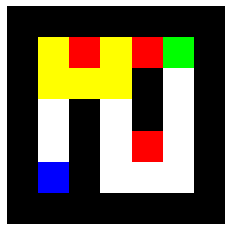

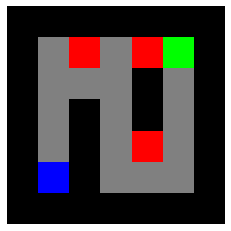

In [35]:
maze = MAZE_simple_coin

MAZE_7x7.show_search_path()
solve_hill(MAZE_7x7, draw=True)

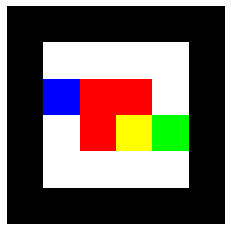

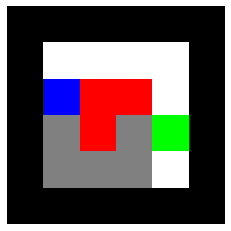

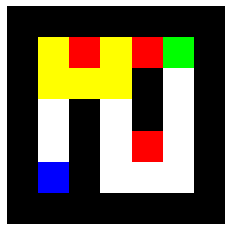

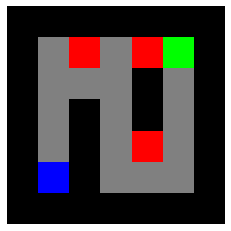

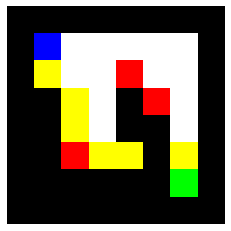

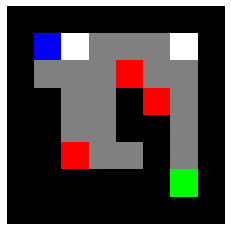

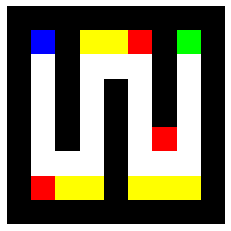

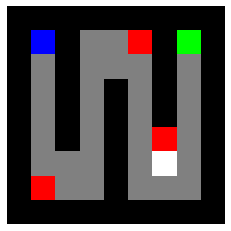

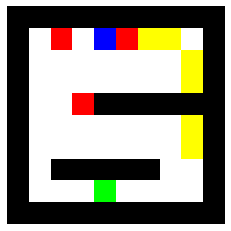

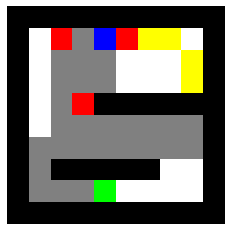

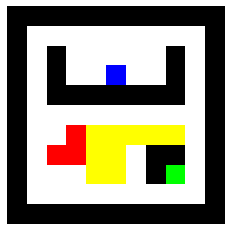

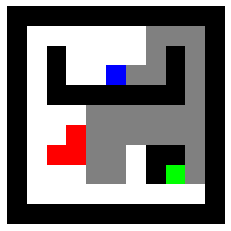

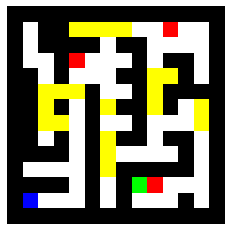

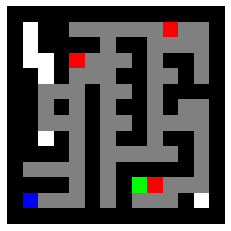

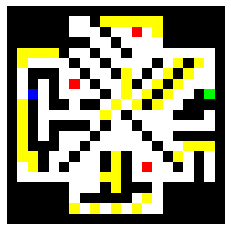

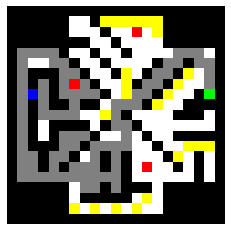

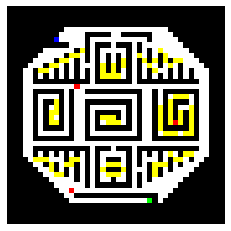

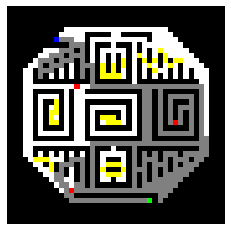

In [38]:
mazes = [
    MAZE_6x6,
    MAZE_7x7,
    MAZE_8x8,
    MAZE_9x9,
    MAZE_10x10,
    MAZE_11x11,
    MAZE_14x14,
    MAZE_21x21,
    MAZE_42x42,
]


for maze in mazes:
    maze.show_search_path()
    solve_hill(maze, draw=True)


# **Time comparison between the algorithms**

In this section we compare the performance between those five algorithms we chose to study, to make this we created a few mazes with the following sizes `(6x6, 7x7, 8x8, 9x9, 10x10, 11x11, 14x14, 21x21, 42x42)` and ran each algorithm in each maze with the same modeling for the Problem, trying to get the fastest path to achieve the goal.

In [30]:
running_time = {'A Star':[], 'Iterative Deepening':[], 'Uniform Cost Search':[], 'Best First Graph Search':[], 'Hill Climbing':[]}
#Running time in seconds
#Maze 6x6
running_time['A Star'].append(0.0007104873657226562)
running_time['Iterative Deepening'].append(0.0011591911315917969)
running_time['Uniform Cost Search'].append(0.0003838539123535156)
running_time['Best First Graph Search'].append(0.0007507801055908203)
running_time['Hill Climbing'].append(0.00022531871974933892)

#Maze 7x7
running_time['A Star'].append(0.0011768341064453125)
running_time['Iterative Deepening'].append(0.1646897792816162)
running_time['Uniform Cost Search'].append(0.00042819976806640625)
running_time['Best First Graph Search'].append(0.00070953369140625)
running_time['Hill Climbing'].append(0.00048109283990925176)

#Maze 8x8
running_time['A Star'].append(0.0021042823791503906)
running_time['Iterative Deepening'].append(0.14400005340576172)
running_time['Uniform Cost Search'].append(0.0008845329284667969)
running_time['Best First Graph Search'].append(0.0008950233459472656)
running_time['Hill Climbing'].append(0.0008475602199905553)

#Maze 9x9
running_time['A Star'].append(0.002640247344970703)
running_time['Uniform Cost Search'].append(0.0007863044738769531)
running_time['Best First Graph Search'].append(0.001131296157836914)
running_time['Hill Climbing'].append(0.0008367409004131331)

#Maze 10x10
running_time['A Star'].append(0.00879669189453125)
running_time['Uniform Cost Search'].append(0.0014567375183105469)
running_time['Best First Graph Search'].append(0.002456188201904297)
running_time['Hill Climbing'].append(0.0012667248403886334)

#Maze 11x11
running_time['A Star'].append(0.004162311553955078)
running_time['Uniform Cost Search'].append(0.0014829635620117188)
running_time['Best First Graph Search'].append(0.001596212387084961)
running_time['Hill Climbing'].append(0.0009911108695087024)

#Maze 14x14
running_time['A Star'].append(0.039469242095947266)
running_time['Uniform Cost Search'].append(0.0037696361541748047)
running_time['Best First Graph Search'].append(0.004131793975830078)
running_time['Hill Climbing'].append(0.002608965449908283)

#Maze 21x21
running_time['A Star'].append(0.006997346878051758)
running_time['Uniform Cost Search'].append(0.015733718872070312)
running_time['Best First Graph Search'].append(0.0033960342407226562)
running_time['Hill Climbing'].append(0.002199435359216295)

#Maze 42x42
running_time['A Star'].append(0.042211055755615234)
running_time['Uniform Cost Search'].append(0.03821563720703125)
running_time['Best First Graph Search'].append(0.024885892868041992)
running_time['Hill Climbing'].append(0.01932271988975117)

Text(0, 0.5, 'Running time (ms)')

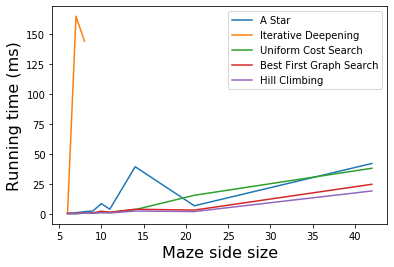

In [31]:
import matplotlib.pyplot as plt

def plot_graphs(running_time):
  x = [6,7,8,9,10,11,14,21,42]
  for k, v in running_time.items():
    x_aux = x[:len(v)]
    for i in range(len(v)):
        v[i] *= 1000

    plt.plot(x_aux, v, label=k)

plot_graphs(running_time)
plt.legend()
plt.xlabel('Maze side size', fontsize=16)
plt.ylabel('Running time (ms)', fontsize=16)

As we can see, the iterative deepening search method has a very bad performance compared to the other algorithms, to investigate this, we've tryied running both the algorithms breadth first search and depth first search on the mazes, and we got much faster results. So we've concluded that, since the iterative deepening method is based on an combination between bfs and dfs, with the memory complexity of dfs (that uses less memory than bfs), the reason why it is running so slow is because it has to compute the states multiple times due to its characteristic that simulates a bfs using an dfs.

Finally, besides this outlier, all the other algorithmns had similar time performances when running all the mazes we've created. So to solve this problem, we would certainly choose the algorithmn A*, because since time wasn't a problem, this algorithmn is complete and always provide the optmal solution for the problem modeled.

# **Work Organization**

**Obs**: Each member worked with one search algorithm and realised experiments with different metrics, mazes and cost functions.

*   **Gabriel Oliveira dos Santos:** PacmanProblem base modeling, A* Search testing and final report participation (running time report, explanatory texts and heuristic consistence report)
*   **Flávio Reginato**: Iterative Deepening Search testing and final report participation (running time report, comparison between algorithms and conclusion report)
*   **Matheus Esteves Zanoto**: Maze generator, Uniform Cost Search testing and final report participation (running time report, heuristic definition and usage/table for comparison)
*   **Lucas Galante**: Best First Search testing
*   **Felipe V. "Bidu" Rodrigues**: Hill Climbing Search testing and video organization/creation